Number of objects detected: 5


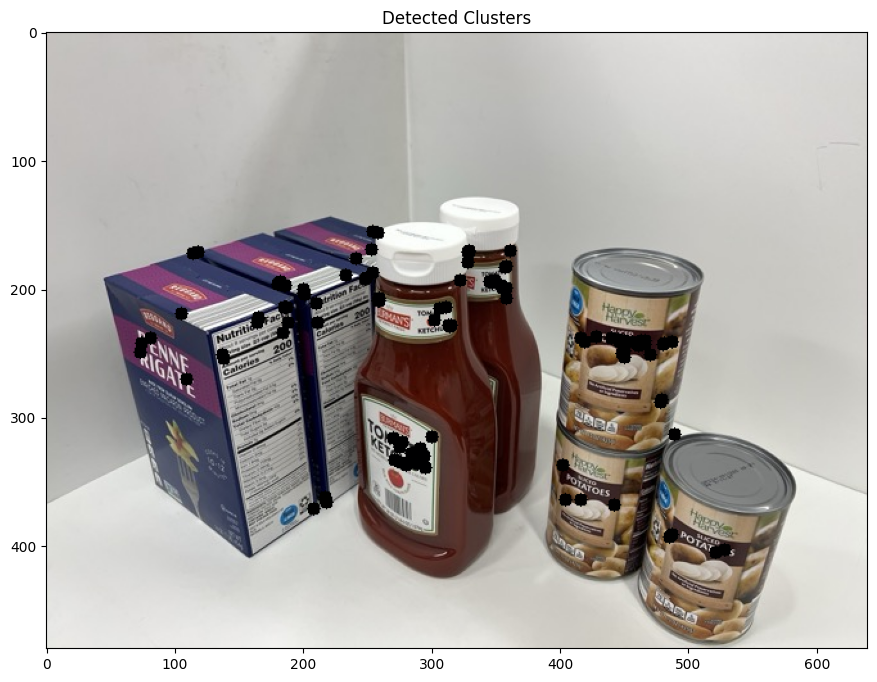

In [ ]:
import cv2
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the main image
main_image = cv2.imread('IMG_98.jpeg')
main_gray = cv2.cvtColor(main_image, cv2.COLOR_BGR2GRAY)

# Load the template image (Whether it be Ketchup Small (KS), K, Potato Small (PS), P, Box Small (BS), B)
template = cv2.imread('KS.jpeg', 0)

# Initialize ORB for Feature Detection
orb = cv2.ORB_create()

# Detect keypoints and descriptors in both images with ORB
keypoints1, descriptors1 = orb.detectAndCompute(main_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(template, None)

# Match features using the BFMatcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches by distance Clusters that have lower distance from each other are classified as better matched
matches = sorted(matches, key=lambda x: x.distance)

# Extract the matched locations
points = np.array([keypoints1[match.queryIdx].pt for match in matches])

# Apply DBSCAN for clustering matched points
dbscan = DBSCAN(eps=50, min_samples=3) 
labels = dbscan.fit_predict(points)

# Visualize the clusters on the main image
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

clustered_image = main_image.copy()
for label, color in zip(unique_labels, colors):
    if label == -1:  # Noise
        continue
    class_member_mask = (labels == label)
    for point in points[class_member_mask]:
        cv2.circle(clustered_image, (int(point[0]), int(point[1])), 5, color[:3], -1)

# Count the number of clusters
num_clusters = len(unique_labels) - (1 if -1 in labels else 0)

# Display results
print(f"Number of objects detected: {num_clusters}")

plt.figure(figsize=(12, 8))
plt.imshow(cv2.cvtColor(clustered_image, cv2.COLOR_BGR2RGB))
plt.title("Detected Clusters")
plt.show()